In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
fifa=pd.read_csv('fifa_stats.csv')

In [3]:
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [5]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall_rating', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height',
       'Weight'],
      dtype='object')

In [7]:
fifa.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall_rating                int64
Potential                     int64
Club                         object
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate                    object
Position                     object
Jersey Number                 int64
Height                      float64
Weight                        int64
dtype: object

In [8]:
fifa.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


In [25]:
fifa.shape

(2000, 15)

# a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [13]:
sample=fifa['Age'].sample(200)

In [14]:
sample.head()

1622    26
261     27
1040    26
1323    31
618     29
Name: Age, dtype: int64

# Central Limit Theorem
The distribution of the sample mean will be normally distributed for the large sample size irrespective of the distribution of the populations from which the sample is drawn.

In [18]:
sigma=np.std(fifa['Age'])
n=200

3.8580963894127795

# Standard error

In [21]:
se=sigma/np.sqrt(n)
print('Standard error:', se)

Standard error: 0.2728086119425111


Mean of the sampling distribution is same as the mean of the population

In [23]:
samp_mean=np.mean(fifa['Age'])
print('Mean of the sampling distribution:', samp_mean)

Mean of the sampling distribution: 27.2315


In the formula of Standard error,  n is in the denominator and with increase in trhe value of n,value of se started decreasing. 

In non technical terms, we observe that when the sample size increase it starts representing the population more accurately
and mean of the distribution of means of samples start moving towards the population mean and therefore Standard error decreases.


# b)	Is there any evidence that the players overall rating is greater than 80?

# Constructing the Hypothesis

# Null Hypothesis
 players overall rating is less than equal to 80.
 

# Alternate hypothesis
 players overall rating is greater than 80.

It is right tailed test.

In [30]:
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [37]:
x_bar=np.mean(fifa['Overall_rating'])

In [38]:
x_bar

78.197

In [31]:
sigma=np.std(fifa['Overall_rating'])
n=fifa.shape[0]

In [33]:
se=sigma/np.sqrt(n)

In [60]:
stats.norm.interval(0.95, loc=x_bar, scale=sigma)

(71.75823013988202, 84.63576986011799)

# Inference:-
Since, hypothesisedValue=80 is in confidence interval, we failed to reject the null hypothesis.
Therefore, players overall rating is not greater than 80.

# Critical value approach

In [45]:
#Critical value
z_critical=stats.norm.isf(0.05)
print('Critical value', z_critical)

Critical value 1.6448536269514729


In [51]:
#Finding the test statistics
test_stats=(x_bar-80)/se
test_stats

-24.544597415236936

In [52]:
from statsmodels.stats import weightstats as stests

In [54]:
stests.ztest(fifa['Overall_rating'], value=80, alternative='larger')

(-24.538460498672062, 1.0)

In [58]:
pvalue=stats.norm.sf(-24.544597415236936)
pvalue

1.0

# c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.



In [61]:
fifa.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall_rating                int64
Potential                     int64
Club                         object
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate                    object
Position                     object
Jersey Number                 int64
Height                      float64
Weight                        int64
dtype: object

In [62]:
fifa['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

# Constructing the hypothesis

# Null Hypothesis
preferred foot has no impact on potential.

# Alternate hypothesis
preferred foot has any impact on potential.

It is two tailed test

In [67]:
fifa['Preferred Foot'].value_counts()

Right    1534
Left      466
Name: Preferred Foot, dtype: int64

<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

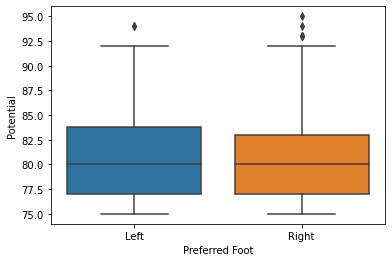

In [66]:
sns.boxplot(data=fifa, x='Preferred Foot', y='Potential')

In [76]:
left=fifa[fifa['Preferred Foot']=='Left']['Potential']
right=fifa[fifa['Preferred Foot']=='Right']['Potential']

In [68]:
from statsmodels.stats import weightstats as stests

In [78]:
test_stats, pvalue=stests.ztest(x1=left, x2=right,value=0 )
print('P value:', pvalue)

P value: 0.1240966083204813


# Inference:-
Since, pvalue is greater than the alpha=0.05. Failed to reject(accept) H0.
Therefore, preferred foot has no impact on potential.

# d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

# Constructing the null hypothesis

# Null Hypothesis
There is no relation between overall rating and potential.


# Alternate hypothesis
There is a relation between overall rating and potential.

In [79]:
from statsmodels.stats import weightstats as stests

In [82]:
stests.ztest(x1=fifa['Overall_rating'], x2=fifa['Potential'], value=0)

(-17.89175319557915, 1.367376995153535e-71)

# Inference:-
Since pvalue is less then the alpha=0.05.
We reject the null hyp.
Therefore, There is a relation between the overall rating and the potential of palyers. 

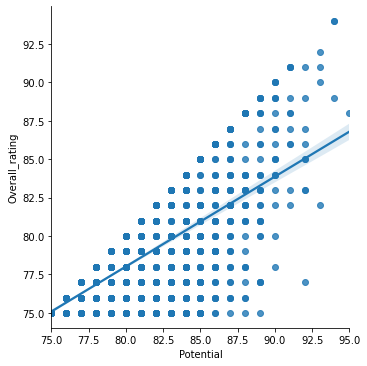

In [108]:
sns.lmplot(data=fifa, x='Potential', y='Overall_rating');

# e)	Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.

In [88]:
fifa['Skill Moves'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [89]:
fifa.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall_rating                int64
Potential                     int64
Club                         object
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate                    object
Position                     object
Jersey Number                 int64
Height                      float64
Weight                        int64
dtype: object

Since, the skill move is a categorical variable and overall rating is numerical variable.
To use one way anova test to check the variability of the overall rating with respect to different skill moves;
the sample should be drawn from normally distributed data and the population variannces for the different skill move is equal. 

# Constructing the hypothesis

# Null hypothesis
Different skill moves has no effect on the overall rating

# Alternative Hypothesis
There is atleast one move which has effect on overall rating

It is Right tailed test

In [104]:
fifa['Skill Moves']=fifa['Skill Moves'].astype('int64')

In [105]:
fifa.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall_rating                int64
Potential                     int64
Club                         object
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate                    object
Position                     object
Jersey Number                 int64
Height                      float64
Weight                        int64
dtype: object

In [114]:
rating1=fifa[fifa['Skill Moves']==1]['Overall_rating']
rating2=fifa[fifa['Skill Moves']==2]['Overall_rating']
rating3=fifa[fifa['Skill Moves']==3]['Overall_rating']
rating4=fifa[fifa['Skill Moves']==4]['Overall_rating']
rating5=fifa[fifa['Skill Moves']==5]['Overall_rating']

In [107]:
stats.f_oneway(rating1,rating2, rating3, rating4, rating5)

F_onewayResult(statistic=31.085141826531746, pvalue=3.8236370526660514e-25)

# Inference:-
Since, pvalue is less than the alpha=0.05.
So, reject the H0.
Therefore, There is atleast one skill moves which has effect on overall rating.

<AxesSubplot:xlabel='Skill Moves', ylabel='Overall_rating'>

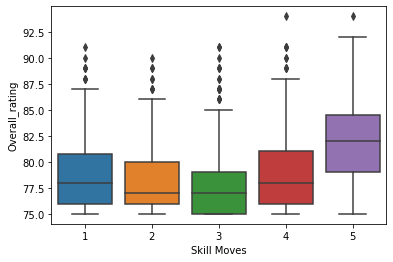

In [115]:
sns.boxplot(x=fifa['Skill Moves'], y=fifa['Overall_rating'])

# 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, and messages of various network. Data Cleaning and basic EDA process needs to be performed. 

# a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.

In [116]:
phone=pd.read_csv('phone.csv')

In [117]:
phone.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [118]:
phone.dtypes

date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

# 95% Confidence interval

In [125]:
samp_mean=np.mean(phone['duration'])

In [124]:
samp_std=np.std(phone['duration'])

In [136]:
stats.norm.interval(0.95, loc=samp_mean, scale=samp_std/np.sqrt(len(phone)))

(141.1797470762666, 147.4301240434043)

# 99% Confidence interval

In [137]:
stats.norm.interval(0.99, loc=samp_mean, scale=samp_std/np.sqrt(len(phone)))

(140.1977416835259, 148.41212943614502)

99% confidence interval is wider because in this interval we decreasing the rejection region.

# Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [139]:
phone.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [145]:
phone.network.unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

# Constructing the hypothesis

# Null Hypothesis
There is no difference between observed value and expected value.

# Alternate Hypothesis
There is no difference between observed value and expected value.

In [170]:
phone.network.value_counts()

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [177]:
obs=phone.network.value_counts().values
exp=[np.round(len(phone)/7)]*7
exp

[117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0]

In [178]:
stats.chisquare(obs,exp)

Power_divergenceResult(statistic=307.7863247863248, pvalue=1.7542899243536984e-63)

# inference:-
Since, pvalue is less then 0.05.
So, Reject the H0.
Therefore, All different categories of network is not equally distributed.

# Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.

<AxesSubplot:xlabel='network', ylabel='duration'>

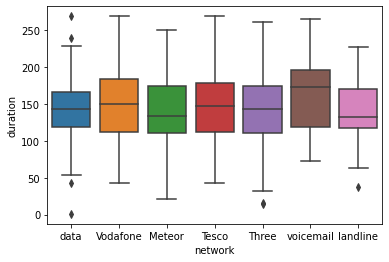

In [156]:
sns.boxplot(x=phone['network'], y=phone['duration'])

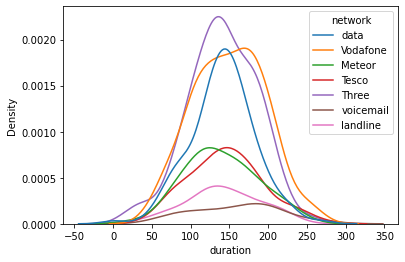

In [152]:
sns.kdeplot(x=phone['duration'], hue=phone['network']);

# d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [157]:
phone.dtypes

date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [158]:
phone.item.unique()

array(['data', 'call', 'sms'], dtype=object)

# Constructing the Hypothesis

# Null Hypothesis
There is no relation between item and duration.


# Alternate hypothesis
Atleast one of the item has relation with the duration.

Since, item is categorical variable and duration is numerical variable.
Apply one way anova test,  

In [161]:
data=phone[phone['item']=='data']['duration']
call=phone[phone['item']=='call']['duration']
sms=phone[phone['item']=='sms']['duration']

In [162]:
stats.f_oneway(data, call, sms)

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)

Conclusion:-There is atleast one category in item which has a relation with duration.

# e)	Perform statistical tests to identify the relation between network and network_type. 

# Constructing the hypothesis

# Null Hypothesis
There is no relation between netwok and network type.

# Alternate Hypothesis
There is a relation between netwok and network type.

In [165]:
tb1=pd.crosstab(phone['network'], phone['network_type'])
tb1

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [167]:
test_stats, pvalue, df, exp_value=stats.chi2_contingency(tb1)

In [168]:
print('Pvalue', pvalue)

Pvalue 0.0


Conclusion:-
There is a relation between netwok and network-type.